In [24]:
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import numpy as np
import os
import zipfile
import xlrd
import plotly.express as px
import re
from scipy import stats as st
import pingouin as pg

sns.set(rc={'figure.figsize': (16,6)}, style='whitegrid')

In [5]:
df = pd.read_csv(r'datasets/4_experiment_lesson_4.csv')

In [6]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [13]:
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

In [14]:
df.delivery_time.describe()

count    20196.000000
mean        42.054169
std         10.382196
min         10.000000
25%         35.000000
50%         42.000000
75%         49.000000
max         83.000000
Name: delivery_time, dtype: float64

In [7]:
df.nunique()

order_id            20196
delivery_time          72
district                3
experiment_group        2
dtype: int64

In [8]:
df.isna().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

<Axes: xlabel='delivery_time', ylabel='Count'>

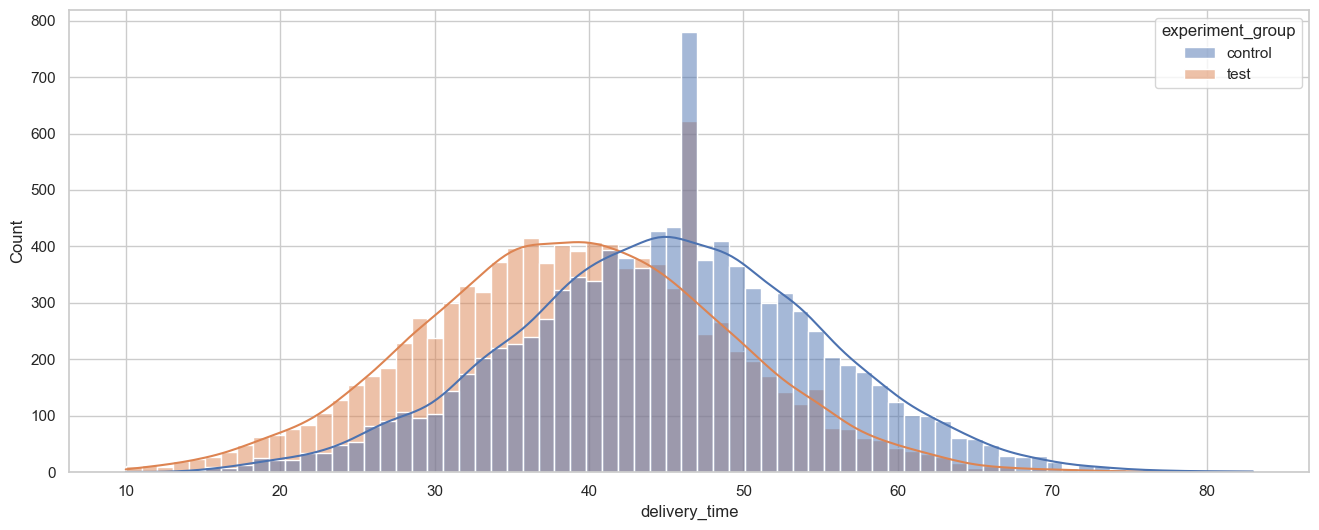

In [10]:
sns.histplot(data=df, x='delivery_time', hue='experiment_group', kde=True)

In [22]:
df.groupby('experiment_group').delivery_time.std()

experiment_group
control    9.990017
test       9.883308
Name: delivery_time, dtype: float64

In [23]:
df.groupby('experiment_group').delivery_time.mean()

experiment_group
control    45.065101
test       39.046813
Name: delivery_time, dtype: float64

In [26]:
pg.normality(data=df, dv='delivery_time', group='experiment_group', method='normaltest')

,W,pval,normal
experiment_group,,,
control,0.253498,0.880955,True
test,7.024157,0.029835,False


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

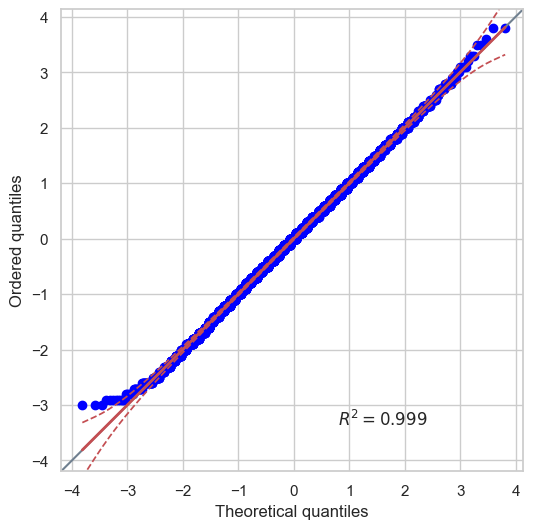

In [28]:
pg.qqplot(df.query('experiment_group == "control"').delivery_time)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

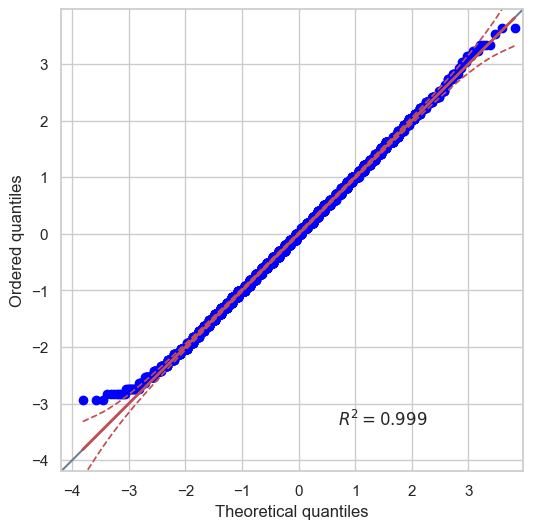

In [29]:
pg.qqplot(df.query('experiment_group == "test"').delivery_time)

In [32]:
st.ttest_ind(a = df.query('experiment_group == "control"').delivery_time, b = df.query('experiment_group == "test"').delivery_time)

TtestResult(statistic=np.float64(43.03582663183714), pvalue=np.float64(0.0), df=np.float64(20194.0))

In [33]:
pg.ttest(x=df.query('experiment_group == "control"').delivery_time, y = df.query('experiment_group == "test"').delivery_time)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,43.035552,20191.127788,two-sided,0.0,"[5.74, 6.29]",0.605658,inf,1.0


In [34]:
st.mannwhitneyu(x=df.query('experiment_group == "control"').delivery_time, y = df.query('experiment_group == "test"').delivery_time)

MannwhitneyuResult(statistic=np.float64(67984508.0), pvalue=np.float64(0.0))

In [35]:
st.ttest_ind(a = df.query('experiment_group == "control"').delivery_time, b = df.query('experiment_group == "test"').delivery_time, trim=0.2)

TtestResult(statistic=np.float64(42.16055367343425), pvalue=np.float64(0.0), df=np.float64(12118.0))

In [36]:
st.ttest_ind(a = df.query('experiment_group == "control"').delivery_time, b = df.query('experiment_group == "test"').delivery_time, permutations=1000)

C:\Users\Илья\AppData\Local\Temp\ipykernel_15572\1476747113.py:1: DeprecationWarning: Arguments {'permutations'} are deprecated, whether passed by position or keyword. They will be removed in SciPy 1.17.0. Use ``method`` to perform a permutation test.
  st.ttest_ind(a = df.query('experiment_group == "control"').delivery_time, b = df.query('experiment_group == "test"').delivery_time, permutations=1000)


TtestResult(statistic=np.float64(43.03582663183714), pvalue=np.float64(0.000999000999000999), df=np.float64(nan))

In [37]:
mean_test = df.query('experiment_group == "test"').delivery_time.mean()
mean_control = df.query('experiment_group == "control"').delivery_time.mean()

In [38]:
(1 - (mean_test/mean_control)) * 100

np.float64(13.354653121660808)